**Task 2**

In [ ]:
!git clone https://github.com/Tai2970/Accent-Recognition-Project.git
%cd Accent-Recognition-Project

Cloning into 'Accent-Recognition-Project'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 370 (delta 57), reused 10 (delta 10), pack-reused 286 (from 3)
Receiving objects: 100% (370/370), 3.81 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (170/170), done.
/content/Accent-Recognition-Project


In [ ]:
import os
print(os.listdir("data/american/"))

['common_voice_en_41503591.wav', 'common_voice_en_41816931.wav', 'common_voice_en_41823983.wav', 'common_voice_en_41526838.wav', 'common_voice_en_41680077.wav', 'common_voice_en_41693119.wav', 'common_voice_en_41678018.wav', 'README.md', 'common_voice_en_41633128.wav', 'common_voice_en_41586424.wav', 'common_voice_en_41881685.wav']


In [ ]:
import librosa
import soundfile as sf

# Define file path
file_path = "data/american/common_voice_en_41633128.wav"

# Load the audio
y, sr = librosa.load(file_path, sr=None)  # Keep original sample rate

# Convert to 16kHz & Mono
target_sample_rate = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sample_rate)

# Save the converted file
sf.write("data/american/processed_common_voice_en_41633128.wav", y_resampled, target_sample_rate)

print("✅ Audio converted to 16kHz and saved successfully!")

✅ Audio converted to 16kHz and saved successfully!


In [ ]:
import librosa
import soundfile as sf
import os

# Define paths
input_folder = "data/american/"
output_folder = "data/american/processed/"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Target sample rate
target_sample_rate = 16000

# Process all .wav files
for filename in os.listdir(input_folder):
    if filename.endswith(".wav") and not filename.startswith("processed_"):  # Skip processed files
        file_path = os.path.join(input_folder, filename)

        # Load the audio
        y, sr = librosa.load(file_path, sr=None)  # Keep original sample rate

        # Convert to 16kHz
        y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sample_rate)

        # Save the converted file
        output_file_path = os.path.join(output_folder, f"processed_{filename}")  # Add "processed_" to filename
        sf.write(output_file_path, y_resampled, target_sample_rate)

        print(f"✅ Processed: {filename}")

print("🎉 All files have been converted to 16kHz and saved in 'processed/' folder!")

✅ Processed: common_voice_en_41503591.wav
✅ Processed: common_voice_en_41816931.wav
✅ Processed: common_voice_en_41823983.wav
✅ Processed: common_voice_en_41526838.wav
✅ Processed: common_voice_en_41680077.wav
✅ Processed: common_voice_en_41693119.wav
✅ Processed: common_voice_en_41678018.wav
✅ Processed: common_voice_en_41633128.wav
✅ Processed: common_voice_en_41586424.wav
✅ Processed: common_voice_en_41881685.wav
🎉 All files have been converted to 16kHz and saved in 'processed/' folder!


In [ ]:
import os
print(os.listdir("data/american/processed/"))

['common_voice_en_41503591.wav', 'common_voice_en_41816931.wav', 'processed_common_voice_en_41816931.wav', 'processed_common_voice_en_41881685.wav', 'common_voice_en_41823983.wav', 'common_voice_en_41526838.wav', 'processed_common_voice_en_41633128.wav', 'common_voice_en_41680077.wav', 'common_voice_en_41693119.wav', 'common_voice_en_41678018.wav', 'processed_common_voice_en_41678018.wav', 'processed_common_voice_en_41526838.wav', 'processed_common_voice_en_41823983.wav', 'common_voice_en_41633128.wav', 'processed_common_voice_en_41503591.wav', 'processed_common_voice_en_41586424.wav', 'processed_common_voice_en_41693119.wav', 'common_voice_en_41586424.wav', 'common_voice_en_41881685.wav', 'processed_common_voice_en_41680077.wav']


**Task 3**

MFCCs Shape: (13, 256)


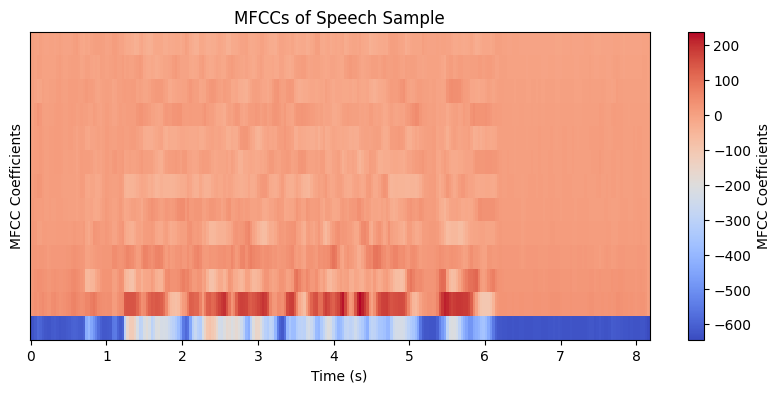

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load a processed audio file
file_path = "data/american/processed/common_voice_en_41503591.wav"  # Change file name if needed
y, sr = librosa.load(file_path, sr=16000)  # Load audio at 16kHz

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs

# Print MFCC shape
print(f"MFCCs Shape: {mfccs.shape}")

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of Speech Sample")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

In [ ]:
import os
import numpy as np
import librosa

# Define paths
input_folder = "data/american/processed/"
output_folder = "data/american/mfcc_features/"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all .wav files
for filename in os.listdir(input_folder):
    if filename.endswith(".wav"):
        file_path = os.path.join(input_folder, filename)

        # Load audio
        y, sr = librosa.load(file_path, sr=16000)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Save MFCCs as .npy (numpy array format)
        np.save(os.path.join(output_folder, filename.replace(".wav", ".npy")), mfccs)

        print(f"✅ Extracted MFCCs: {filename}")

print("🎉 All MFCC features have been extracted and saved in 'mfcc_features/' folder!")

✅ Extracted MFCCs: common_voice_en_41503591.wav
✅ Extracted MFCCs: common_voice_en_41816931.wav
✅ Extracted MFCCs: processed_common_voice_en_41816931.wav
✅ Extracted MFCCs: processed_common_voice_en_41881685.wav
✅ Extracted MFCCs: common_voice_en_41823983.wav
✅ Extracted MFCCs: common_voice_en_41526838.wav
✅ Extracted MFCCs: processed_common_voice_en_41633128.wav
✅ Extracted MFCCs: common_voice_en_41680077.wav
✅ Extracted MFCCs: common_voice_en_41693119.wav
✅ Extracted MFCCs: common_voice_en_41678018.wav
✅ Extracted MFCCs: processed_common_voice_en_41678018.wav
✅ Extracted MFCCs: processed_common_voice_en_41526838.wav
✅ Extracted MFCCs: processed_common_voice_en_41823983.wav
✅ Extracted MFCCs: common_voice_en_41633128.wav
✅ Extracted MFCCs: processed_common_voice_en_41503591.wav
✅ Extracted MFCCs: processed_common_voice_en_41586424.wav
✅ Extracted MFCCs: processed_common_voice_en_41693119.wav
✅ Extracted MFCCs: common_voice_en_41586424.wav
✅ Extracted MFCCs: common_voice_en_41881685.wa

In [ ]:
import os
print(os.listdir("data/american/mfcc_features/"))

['common_voice_en_41823983.npy', 'processed_common_voice_en_41881685.npy', 'common_voice_en_41633128.npy', 'common_voice_en_41881685.npy', 'processed_common_voice_en_41633128.npy', 'processed_common_voice_en_41586424.npy', 'common_voice_en_41503591.npy', 'processed_common_voice_en_41678018.npy', 'common_voice_en_41693119.npy', 'common_voice_en_41680077.npy', 'common_voice_en_41526838.npy', 'processed_common_voice_en_41503591.npy', 'processed_common_voice_en_41680077.npy', 'common_voice_en_41816931.npy', 'processed_common_voice_en_41816931.npy', 'processed_common_voice_en_41526838.npy', 'common_voice_en_41678018.npy', 'common_voice_en_41586424.npy', 'processed_common_voice_en_41693119.npy', 'processed_common_voice_en_41823983.npy']


In [ ]:
import os

# Define the path to the MFCC folder
mfcc_folder = "data/american/mfcc_features/"

# Loop through all files and remove non-processed ones
for filename in os.listdir(mfcc_folder):
    if filename.startswith("common_voice_en_") and filename.endswith(".npy"):  # Unprocessed files
        file_path = os.path.join(mfcc_folder, filename)
        os.remove(file_path)  # Delete file
        print(f"🗑 Deleted: {filename}")

print("✅ Cleanup complete! Only processed files remain.")

🗑 Deleted: common_voice_en_41823983.npy
🗑 Deleted: common_voice_en_41633128.npy
🗑 Deleted: common_voice_en_41881685.npy
🗑 Deleted: common_voice_en_41503591.npy
🗑 Deleted: common_voice_en_41693119.npy
🗑 Deleted: common_voice_en_41680077.npy
🗑 Deleted: common_voice_en_41526838.npy
🗑 Deleted: common_voice_en_41816931.npy
🗑 Deleted: common_voice_en_41678018.npy
🗑 Deleted: common_voice_en_41586424.npy
✅ Cleanup complete! Only processed files remain.


In [ ]:
print(os.listdir("data/american/mfcc_features/"))

['processed_common_voice_en_41881685.npy', 'processed_common_voice_en_41633128.npy', 'processed_common_voice_en_41586424.npy', 'processed_common_voice_en_41678018.npy', 'processed_common_voice_en_41503591.npy', 'processed_common_voice_en_41680077.npy', 'processed_common_voice_en_41816931.npy', 'processed_common_voice_en_41526838.npy', 'processed_common_voice_en_41693119.npy', 'processed_common_voice_en_41823983.npy']
